# Summary
These notes are for absolute beginners in **python** and **graphs**.

We will look at:
- list (basic usage)
- a graph represented by an edge list
- a graph represented by an adjacency list
- traversing a graph

# List (basic usage)
- symbol [], elements separated by comma
- ordered
- heterogenuous ('anything' can be an element)

First things to know:
- access operator [] argument is either an **index** or a range in the form **first:last:step**, the first element is **0** and the last **-1**
- many functions like (*pop* *append* ...)

In [26]:
l = [12, 'abra', [2, 3.1], 11]
print(l[0], l[-1], l[-2][1], l[1:-1])

12 11 3.1 ['abra', [2, 3.1]]


In [27]:
print(l.pop(), l)

11 [12, 'abra', [2, 3.1]]


In [28]:
print(l.pop(0), l)

12 ['abra', [2, 3.1]]


I agree, the output is confusing: we see the values of the variables but not their names! Better ways of doing this are

In [29]:
last = l.pop(0)
print("last element of l is ", last, "l = ", l)
print(f"{last=} {l=}")

last element of l is  abra l =  [[2, 3.1]]
last='abra' l=[[2, 3.1]]


The last print statement is the most efficient. It uses *f-strings*, notice the usage of the =-sign; the curly braces are used for variable substitution.

# Graph as edge list
We consider a directed graph $G=(V,E)$ with $n=\#V$ edges and $m=\#E$ edges. The vertices of $V$ are identfied by means of a numbering $[1,\cdots,n]\to V$. The graph is now fully described by a list of all edges, an edge being represented as a two-element list of indices. For example:

In [30]:
edge_list = [[0,1], [2,1], [3,2], [4,3], [0,4], [1,4], [2,0], [4,2]]

In order to visualize our graph, we use *networkx* and *matplotlib*. 

DiGraph with 5 nodes and 8 edges


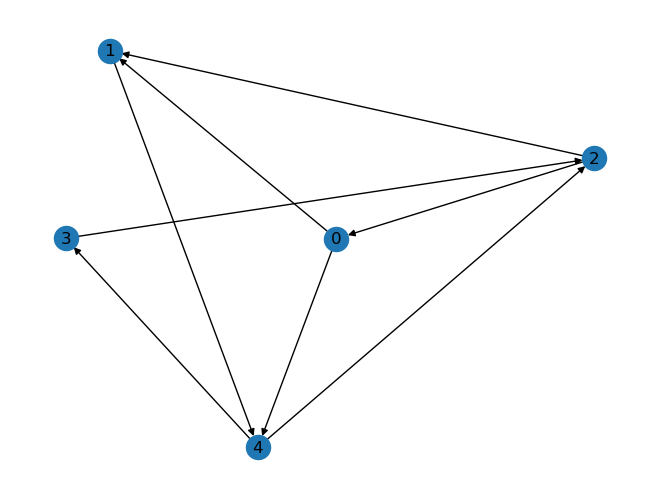

In [31]:
#!pip install networkx
import networkx as nx
G = nx.DiGraph(edge_list)
print(G)
nx.draw(G, with_labels = True)

The list of edges can be deintified with a matrix $B\in\{0,1\}^{n\times m}$, where

$$
B_{ij) =
\begin{cases}
1 &\quad \text{vertex $i$ is incident with edge $j$},\\
0 &\quad \text{else}.
\end{cases}
$$

This is the **indicence matrix** of the graph.

# Graph as adjancy list
Alternatively, we can give the list of all neighbors for given vertex. Let us construct the neighbor_list from the edge_list.

We start by creating an empty list containing $n$ empty lists, using *list comprehension*. Then we use a typical python loop over a list (the edges). Have a close look at the syntax of the loop (all other python constructions are similar): we use the double-point at the end of the for statement and the following **indented lines** are the corps, the code to be executed. Be carful with indentation in python!

In [32]:
neighbor_list = [[] for i in range(5)]
for e in edge_list:
    neighbor_list[e[0]].append(e[1])
print(neighbor_list)

[[1, 4], [4], [1, 0], [2], [3, 2]]


In [33]:
H = nx.DiGraph()
H.add_nodes_from([0, 1, 2, 3, 4])
for i,neis in enumerate(neighbor_list):
    for nei in neis:
        H.add_edge(i, nei)
print(H)

DiGraph with 5 nodes and 8 edges


Here we have used the enumerate() function, which allows us to get the index i.

In [ ]:
print(H.nodes()==G.nodes())
print(H.edges()==G.edges())
print(H==G)
print(nx.utils.graphs_equal(G,H))
nx.draw(H, with_labels = True)

At this point it might be good to introduce functions. The keyword us **def**, the arguments are fiven in paranthesis (which we have already seen the function pop()). Finally the ouput is defined by **return**. 

In [36]:
def neighborlist_to_digraph(nlist):
    H = nx.DiGraph()
    H.add_nodes_from(range(len(nlist)))
    for i,neis in enumerate(nlist):
        for nei in neis:
            H.add_edge(i, nei)
    return H

We have used the (global) python functions len() and range(). Let try our function

In [38]:
H2 = neighborlist_to_digraph(neighbor_list)
print(H2)
print(nx.utils.graphs_equal(H2,H))

DiGraph with 5 nodes and 8 edges
True


# Graph traversal
We want to walk along the edges in order to get a list of all vertices, starting with an arbitrary vertex, and avoiding to visit a vertex again. Clearly, we have to track of the visited ones. But clearly we have to decide of the order to choose the next vertex: should we first visit all neighbors or should we first go as far as we can from one neighbor? The difference is
-- breadth-first-search
-- depth-first-search
We will see that there is only a minimal difference in coding...

Lets start with breadth-search. We will use a list to construct our path and a list for next vertices to visit (since we can only by one). We call this list queue (since this the name in computer science) and fill it with the first vertex. So

In [11]:
path = []
queue = [0]
while queue:
    u = queue.pop(0)
    path.append(u)
    for v in neighbor_list[u]:
        if v not in path and v not in queue:
            queue.append(v)
print(f"{path=}")

path=[0, 1, 4, 3, 2]


Our prefernce to first visit all neigbors of a given vertex (before going to the childs) is expressed in the argument of the pop function!  
What if instead we use the newest one? (well, this is no stack in terms of computer science).

In [12]:
path = []
stack = [0]
while stack:
    u = stack.pop()
    path.append(u)
    for v in neighbor_list[u]:
        if v not in path and v not in stack:
            stack.append(v)
print(f"{path=}")

path=[0, 4, 2, 3, 1]


We start from 0 to 4, but this time the next vertex comes from a newer generation, 2 is a child of 4. But then the child of 2 is 0, which we have already seen... so we take the other child of 4, which is 3...  
It is interesting to print out the values of the stack/queue variables in each step..